In [20]:
import nltk 
nltk.download('book',quiet=True) #샘플 말뭉치 다운로드
from nltk.book import * 

In [21]:
#저작권이 만료된 샘플문학작품 목록
nltk.corpus.gutenberg.fileids() 

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [22]:
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [23]:
from nltk.tokenize import sent_tokenize 
sent_tokenize(emma_raw[:1000])[3] #문장 나누기

"Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma."

In [24]:
from nltk.tokenize import word_tokenize 
word_tokenize(emma_raw[50:100]) #단어 나누기

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [25]:
#어근추출기
from nltk.stem import PorterStemmer,LancasterStemmer
st1=PorterStemmer()
st2=LancasterStemmer()
words=['fly','flies','flying','flew','flown']
print([st1.stem(w) for w in words])
print([st2.stem(w) for w in words])

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [26]:
from nltk.stem import WordNetLemmatizer 
lm=WordNetLemmatizer()
words=['fly','flies','flying','flew','flown']
[lm.lemmatize(w, pos='v') for w in words] #동사원형 복원

['fly', 'fly', 'fly', 'fly', 'fly']

In [27]:
nltk.help.upenn_tagset() #품사목록

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [28]:
nltk.help.upenn_tagset('VB') #품사에 대한 설명

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


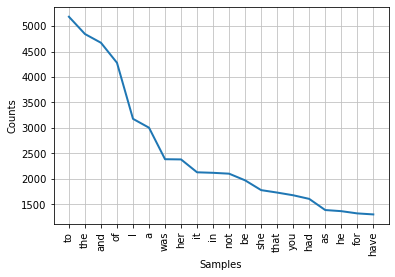

In [29]:
#단어의 출현빈도 그래프
from nltk import Text 
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer 
retokenize=RegexpTokenizer('[\w]+') #특수문자 제거 규칙
text=Text(retokenizer.tokenize(emma_raw)) 
text.plot(20) #출현빈도 상위 20개의 단어
plt.show()

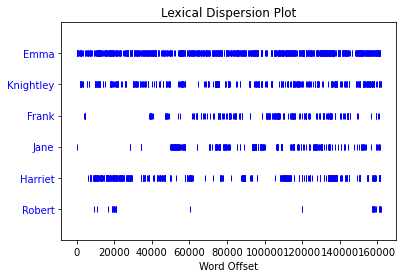

In [30]:
text.dispersion_plot(['Emma','Knightley', 'Frank', 'Jane', 'Harriet','Robert'])
#단어가 출현한 위치 시각화

In [31]:
#단어가 문맥에서 출현한 위치 확인
text.concordance('Emma') 

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [32]:
text.similar('Emma') #유사한 단어들

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [33]:
#두 단어가 공통적으로 들어갈 수 있는 문맥 확인 
text.common_contexts(['Emma','she']) 

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [38]:
from nltk import FreqDist
from nltk.tag import pos_tag 
#불용어 리스트
stopwords=['Mr','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens=pos_tag(retokenize.tokenize(emma_raw)) #품사태깅
print(emma_tokens)
#고유대명사이면서 불용어가 아닌 이름들
names_list=[t[0] for t in emma_tokens if t[1]=='NNP' and t[0] not in stopwords]
fd_names=FreqDist(names_list) #출현빈도 계산
#전체단어수, Emma 단어출현횟수, 확률
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

', 'RB'), ('long', 'RB'), ('that', 'IN'), ('she', 'PRP'), ('had', 'VBD'), ('to', 'TO'), ('suffer', 'VB'), ('from', 'IN'), ('the', 'DT'), ('recurrence', 'NN'), ('of', 'IN'), ('any', 'DT'), ('such', 'JJ'), ('uncertainty', 'NN'), ('A', 'DT'), ('very', 'RB'), ('few', 'JJ'), ('days', 'NNS'), ('brought', 'VBD'), ('the', 'DT'), ('party', 'NN'), ('from', 'IN'), ('London', 'NNP'), ('and', 'CC'), ('she', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('sooner', 'NN'), ('an', 'DT'), ('opportunity', 'NN'), ('of', 'IN'), ('being', 'VBG'), ('one', 'CD'), ('hour', 'NN'), ('alone', 'RB'), ('with', 'IN'), ('Harriet', 'NNP'), ('than', 'IN'), ('she', 'PRP'), ('became', 'VBD'), ('perfectly', 'RB'), ('satisfied', 'VBN'), ('unaccountable', 'JJ'), ('as', 'IN'), ('it', 'PRP'), ('was', 'VBD'), ('that', 'IN'), ('Robert', 'NNP'), ('Martin', 'NNP'), ('had', 'VBD'), ('thoroughly', 'RB'), ('supplanted', 'VBN'), ('Mr', 'NNP'), ('Knightley', 'NNP'), ('and', 'CC'), ('was', 'VBD'), ('now', 'RB'), ('forming', 'VBG'), ('all', 'DT

(7863, 830, 0.10555767518758744)

In [39]:
fd_names.most_common(10) #상위 출현빈도 10개 단어

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

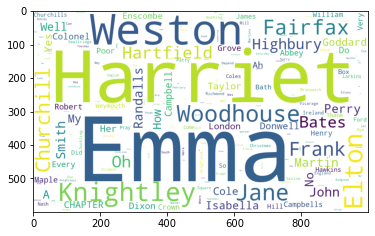

In [37]:
# 등장인물의 워드 클라우드 그래프 
from wordcloud import WordCloud 
wc=WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()